# **Proyecto**

## *Detección y clasificación de Queratocono*

#### Zahid Medrano Flores  <p align="right">zahidmedrano@ciencias.unam.mx &emsp;</p>

## **Introducción**

que es el queratocono bla bla bla

## **Problema**

bla bla bla bla

## **¿Cómo se hará?**

### **Preprocesamiento de los datos**

Primero se cargan las librerias que utilizaremos a lo largo del trabajo. Y simplemente comenzamos cargando los datos.

In [55]:
# librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, mutual_info_classif

In [56]:
#Cargamos los datos y las etiquetas
data = pd.read_csv(r"Datos/dataset.csv")
labels = pd.read_csv(r"Datos/labels.csv")

Información general del dataframe

In [57]:
data.head(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


In [58]:
data.tail(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
3152,12232,1809OS(Left),44.32,67,43.52,157,43.92,0.79,95.5,0.63,...,0.125,103,0.280,0.587,0.440,0.734,100,Enable,0,0
3153,12233,1810OS(Left),47.26,57,46.79,147,47.02,0.47,95.6,0.60,...,0.549,140,0.240,0.689,0.305,0.753,100,Enable,0,0
3154,12234,1810OD(Right),48.94,123,47.23,33,48.09,1.70,95.2,0.68,...,0.417,100,0.440,0.593,0.578,0.828,100,Enable,0,6
3155,12236,1811OS(Left),45.15,82,44.27,172,44.71,0.88,97.0,0.69,...,0.237,227,0.161,0.327,0.258,0.416,100,Enable,0,0
3156,12237,1812OS(Left),46.22,119,44.34,29,45.28,1.88,92.2,0.42,...,0.865,266,0.608,0.921,0.630,1.116,100,Enable,12,7
3157,12238,1812OD(Right),46.60,86,45.79,176,46.19,0.81,97.0,0.75,...,0.384,339,0.164,0.583,0.259,0.638,100,Enable,0,10
3158,12239,1813OS(Left),44.05,82,43.90,172,43.97,0.15,96.4,0.63,...,0.156,217,0.242,0.388,0.387,0.548,100,Enable,0,5
3159,12240,1813OD(Right),44.12,3,43.47,93,43.80,0.66,96.6,0.60,...,0.179,337,0.348,0.313,0.384,0.495,100,Enable,0,0
3160,12241,1814OS(Left),46.59,90,44.74,0,45.66,1.86,96.1,0.74,...,0.609,113,-0.124,1.092,0.842,1.379,100,Enable,0,0
3161,12242,1814OD(Right),46.49,79,45.38,169,45.93,1.11,96.5,0.73,...,0.280,56,0.001,0.726,0.348,0.805,100,Enable,0,0


In [59]:
#Informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [60]:
data.select_dtypes(include ='number').median()

Unnamed: 0          7762.500
Ks                    44.970
Ks.Axis               92.000
Kf                    43.790
Kf.Axis               87.000
                      ...   
S46.sph..like..5       0.434
HOAs.S3456..5          0.717
AA.5                 100.000
ESI.Anterior.          0.000
ESI.Posterior.         0.000
Length: 446, dtype: float64

In [61]:
data.select_dtypes(exclude='object').mean()

Unnamed: 0          7455.013599
Ks                    45.389712
Ks.Axis               90.914611
Kf                    43.843495
Kf.Axis               85.449715
                       ...     
S46.sph..like..5       0.749348
HOAs.S3456..5          1.330833
AA.5                  99.921252
ESI.Anterior.          5.567995
ESI.Posterior.         8.851044
Length: 446, dtype: float64

In [62]:
skew_data = data.select_dtypes(include='number').skew()
skew_data.info

<bound method Series.info of Unnamed: 0          -0.354955
Ks                   4.772129
Ks.Axis             -0.052037
Kf                   3.215234
Kf.Axis              0.087823
                      ...    
S46.sph..like..5     7.128426
HOAs.S3456..5        6.690826
AA.5               -15.486712
ESI.Anterior.        3.798144
ESI.Posterior.       2.942152
Length: 446, dtype: float64>

In [63]:
sel_cols = [column for column, is_type in (data.dtypes=="object").items() if is_type]
sel_cols

['idEye', 'En.Anterior.']

In [64]:
print(data['En.Anterior.'])
print(data['idEye'])

0       Enable
1       Enable
2       Enable
3       Enable
4       Enable
         ...  
3157    Enable
3158    Enable
3159    Enable
3160    Enable
3161    Enable
Name: En.Anterior., Length: 3162, dtype: object
0           1OS(Left)
1          1OD(Right)
2          2OD(Right)
3           4OS(Left)
4          4OD(Right)
            ...      
3157    1812OD(Right)
3158     1813OS(Left)
3159    1813OD(Right)
3160     1814OS(Left)
3161    1814OD(Right)
Name: idEye, Length: 3162, dtype: object


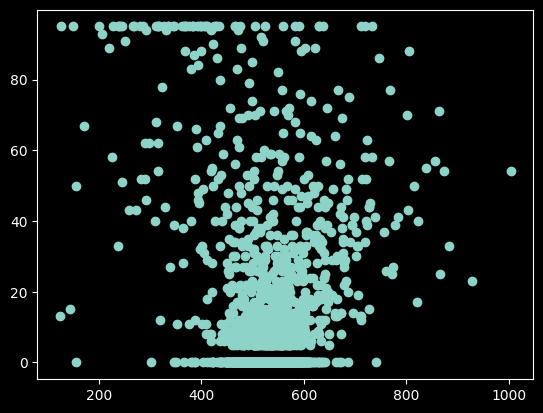

In [65]:
plt.scatter(data['Thinnest'], data['ESI.Posterior.'])

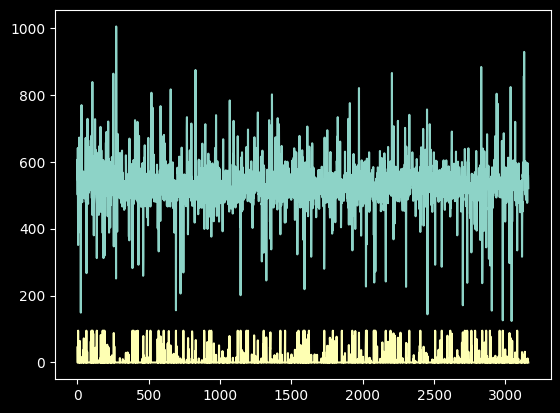

In [66]:
plt.plot(data['Thinnest'])
plt.plot(data['ESI.Anterior.'])

In [67]:
data.isnull().sum()
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3157    False
3158    False
3159    False
3160    False
3161    False
Length: 3162, dtype: bool

Se buscan solo los valores numéricos y que no sean constantes, para filtrarlos del dataset.

In [68]:
data_limpio = data.copy(deep=True)
data_limpio.drop('En.Anterior.', inplace=True, axis=1) #solo valores numéricos

var_thr = VarianceThreshold(threshold = 0.25) #Se quitan constantes y cuasiconstantes. Cambiando el threshold obtenemos mas o menos columnas
#Cambiando el threshold cambia el tamaño del dataframe que se utilizará

var_thr.fit(data_limpio.iloc[:,2: ])
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [69]:
concol = [column for column in data_limpio.iloc[:,2: ].columns 
          if column not in data_limpio.iloc[:,2: ].columns[var_thr.get_support()]]


data_limpio.drop(concol, inplace=True, axis=1)

In [70]:
#Valores numéricos e idEye numerico
data_numerico = pd.get_dummies(data['idEye'])
data_numerico

,1000OD(Right),1000OS(Left),1001OD(Right),1001OS(Left),1002OD(Right),1002OS(Left),1003OD(Right),1003OS(Left),1004OD(Right),1004OS(Left),...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
data_num = pd.concat([data , data_numerico], axis=1).reindex(data.index)    #concatenamos los valores que obtuvimos
data_num.drop(columns=['idEye', 'En.Anterior.'], axis=1, inplace=True)  #quitamos ambas columnas categóricas
data_num

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,False,False,False,False,False,False,False,False,False,False
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,False,False,False,False,False,False,False,False,False,False
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,False,False,False,False,False,False,False,False,False,False
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,False,False,False,False,False,False,False,False,False,False
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,12238,46.60,86,45.79,176,46.19,0.81,97.0,0.75,46.18,...,False,False,False,False,False,False,False,False,False,False
3158,12239,44.05,82,43.90,172,43.97,0.15,96.4,0.63,44.00,...,False,False,False,False,False,False,False,False,False,False
3159,12240,44.12,3,43.47,93,43.80,0.66,96.6,0.60,43.82,...,False,False,False,False,False,False,False,False,False,False
3160,12241,46.59,90,44.74,0,45.66,1.86,96.1,0.74,45.77,...,False,False,False,False,False,False,False,False,False,False


In [72]:
#copiamos el dataset "limpio" para codificar las etiquetas
le = LabelEncoder()
data_le = data_limpio.copy(deep = True)

In [73]:
type(data_le)

label = le.fit_transform(data_le['idEye'].values)
label

array([1638, 1637, 1822, ..., 1593, 1596, 1595], shape=(3162,))

In [74]:
data_le.drop('idEye', axis=1, inplace=True)
data_le['idEye']= label
data_le.head(10)

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,ACCP,Ks.1,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,9,44.53,21,39.22,111,41.87,5.32,86.7,41.67,49.61,...,3.131,97,-0.722,3.350,1.053,3.512,99,45,27,1638
1,10,43.84,39,42.46,129,43.15,1.38,88.2,43.14,48.84,...,0.575,97,0.085,0.921,0.290,0.966,100,0,0,1637
2,39,44.81,66,44.41,156,44.61,0.40,83.0,44.70,49.92,...,0.177,9,0.268,0.263,0.640,0.692,100,0,0,1822
3,55,44.00,51,42.31,141,43.15,1.69,97.3,43.16,49.01,...,0.492,275,-0.281,3.396,1.419,3.680,100,0,29,2204
4,56,45.42,26,45.20,116,45.31,0.22,93.3,45.29,50.60,...,0.571,85,0.109,0.691,0.181,0.714,100,0,7,2203
5,68,62.98,68,42.51,158,52.74,20.47,95.5,49.96,70.17,...,3.791,45,-1.581,13.387,9.154,16.218,98,95,0,2399
6,69,44.23,85,42.86,175,43.54,1.37,96.7,43.55,49.27,...,0.269,88,0.105,0.398,0.376,0.548,100,0,0,2398
7,87,44.61,170,43.75,80,44.18,0.86,97.9,44.14,49.70,...,0.085,20,0.375,0.437,0.360,0.566,100,0,52,2592
8,88,44.13,174,43.03,84,43.58,1.10,97.2,43.52,49.16,...,0.146,229,0.353,0.371,0.485,0.611,100,0,63,2593
9,138,45.83,165,45.37,75,45.60,0.46,96.8,45.60,51.05,...,0.219,74,0.269,0.330,0.315,0.457,100,0,24,2968


<Axes: xlabel='Spherical'>

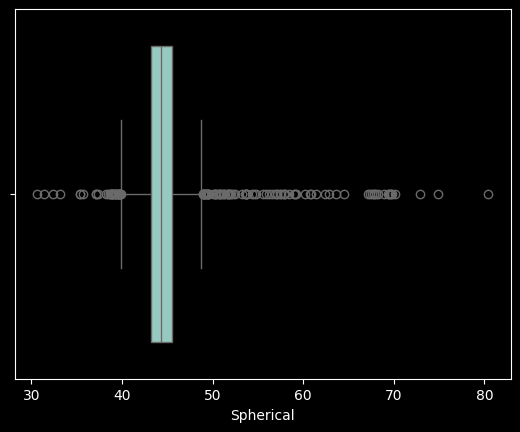

In [75]:
#parte exploratoria del dataframe
sns.boxplot(x='Spherical', data=data)   #podemos cambiar la columna

In [76]:
X = data_le.iloc[:,2:].values
y = labels.iloc[:,-1].values

In [77]:
le = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = le.fit_transform(X[:,i])
y = le.fit_transform(y)

In [78]:
#el scaler se realiza como parte de la "normalización", pero al ser un RandomForest no es necesario
#solo se utiliza para el PCA
standard_scaler = StandardScaler()
#X = standard_scaler.fit_transform(X)

In [79]:
classes = np.unique(y)
nClasses = len(classes)

print('Salida : ', nClasses)
print('Clases : ', classes)

Salida :  4
Clases :  [0 1 2 3]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=None)

In [81]:
print(y_train.mean())
print(y_test.mean())

1.0383327130628954
1.0378947368421052


In [ ]:
#podemos cambiar el tamaño del set de entrenamiento y test, utilizaremos un 85 / 15
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.85, random_state = None)

### **Entrenamiento**

Entrenamos un modelo sencillo, con nuestro dataset ya algo limpio.

In [ ]:
trainedforest = RandomForestClassifier(n_estimators=500,
                                       random_state = None,
                                       n_jobs = -1).fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.96      0.99      0.98       395
           2       0.96      0.72      0.82        32
           3       1.00      1.00      1.00        11

    accuracy                           0.96       475
   macro avg       0.96      0.88      0.92       475
weighted avg       0.96      0.96      0.96       475



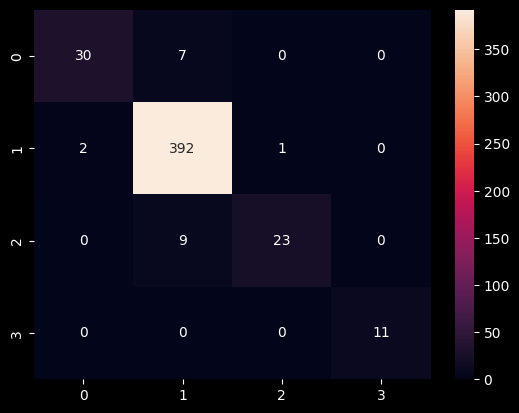

In [ ]:
predictionforest = trainedforest.predict(X_test)    #para la inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')    #Una matriz de confusión, para ver el desempeño
print(classification_report(y_test, predictionforest))  #reporte del modelo

##### - **Hiperparámetros del RandomForest**
Utilizando los paramétros de nuestra optimización, podemos intentar mejorar el modelo

##### - **GridSearch**

In [86]:
trainedforestGS = RandomForestClassifier(n_estimators=400,
                                        min_samples_split= 2,
                                        min_samples_leaf= 1,
                                        max_features = 'sqrt',
                                        max_depth= None,
                                        bootstrap= False,
                                        random_state = None,
                                        n_jobs=-1).fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.96      0.99      0.98       395
           2       0.96      0.72      0.82        32
           3       1.00      1.00      1.00        11

    accuracy                           0.96       475
   macro avg       0.96      0.88      0.92       475
weighted avg       0.96      0.96      0.96       475



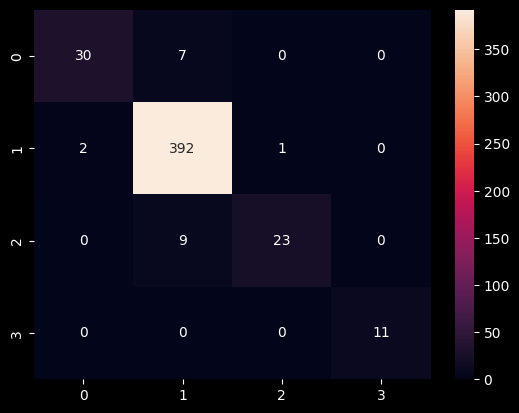

In [87]:
predictionforest1 = trainedforestGS.predict(X_test)

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest))

##### - **RandomizedSearch**

In [88]:
trainedforestRS = RandomForestClassifier(n_estimators= 693,
                                    max_depth= 105,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 4,
                                    min_samples_split=7,
                                    bootstrap= False,
                                    n_jobs=-1).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.96      0.99      0.98       395
           2       0.96      0.72      0.82        32
           3       1.00      1.00      1.00        11

    accuracy                           0.96       475
   macro avg       0.96      0.88      0.92       475
weighted avg       0.96      0.96      0.96       475



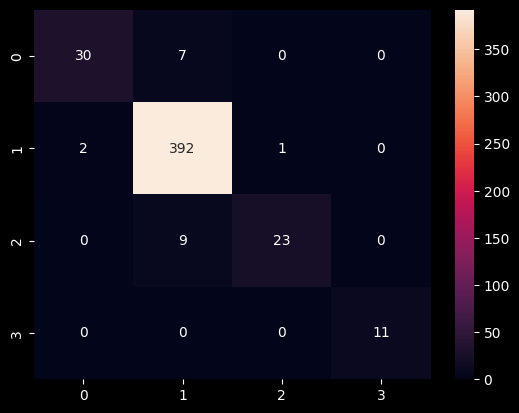

In [ ]:
predictionforest2 = trainedforestRS.predict(X_test) # inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest))  # reporte del modelo

### **Aplicación de PCA y obtención de mejores variables.**

Como se había comentado, la estandarización no es necesaria para un RandomForest, pero si queremos aplicar un PCA si lo necesitamos, aquí solo rehacemos el dataframe y le aplicamos la función.

In [ ]:
X = standard_scaler.fit_transform(X)    # estandarización
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=None)  # 85 / 15

In [ ]:
pca = PCA(n_components=4)   # aplicación sencillisima de PCA
 
X_train_pca = pca.fit_transform(X_train) # fit para el entrenamiento
X_test_pca = pca.transform(X_test)

# varianza del PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print('Explained variation per principal component: {}'.format(explained_variance))
print('Total explained variance: {}'.format(total_explained_variance))

Explained variation per principal component: [0.28932289 0.13118673 0.06014866 0.04171603]
Total explained variance: 0.5223743093593833


##### **Entrenamiento PCA**

Volvemos a aplicar los 3 modelos que tenemos, el "normal" y los dos ajustados.

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.95      0.97      0.96       389
           2       0.81      0.71      0.76        31
           3       0.71      0.71      0.71         7

    accuracy                           0.93       475
   macro avg       0.83      0.80      0.82       475
weighted avg       0.93      0.93      0.93       475



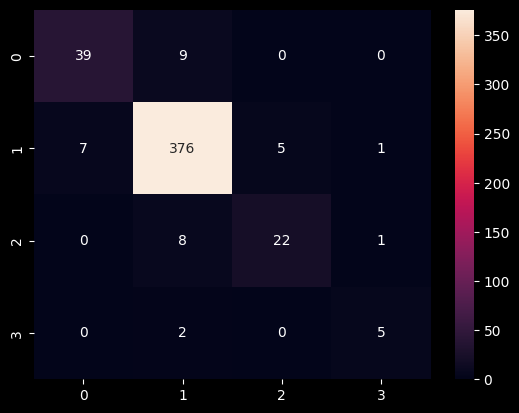

In [ ]:
trainedforest_pca = trainedforest.fit(X_train_pca,y_train)  # RandomForest número 1 con PCA

predictionforest_pca = trainedforest_pca.predict(X_test_pca)    # inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca))  # reporte del modelo 1

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.95      0.96      0.96       389
           2       0.76      0.71      0.73        31
           3       0.67      0.86      0.75         7

    accuracy                           0.93       475
   macro avg       0.81      0.84      0.82       475
weighted avg       0.93      0.93      0.93       475



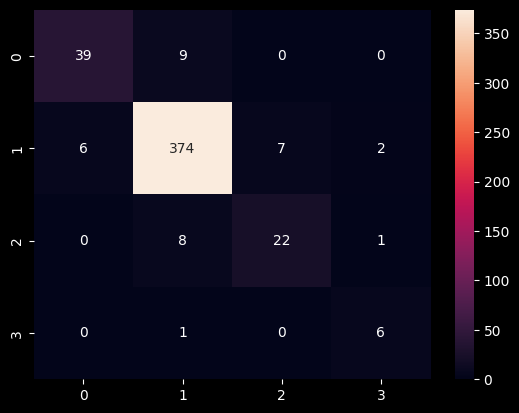

In [ ]:
trainedforest_pca = trainedforestGS.fit(X_train_pca,y_train)    # RandomForest número 2 con PCA. GridSearch

predictionforest_pca = trainedforest_pca.predict(X_test_pca)    # inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca))  # reporte del modelo

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.95      0.97      0.96       389
           2       0.81      0.71      0.76        31
           3       0.86      0.86      0.86         7

    accuracy                           0.93       475
   macro avg       0.87      0.84      0.85       475
weighted avg       0.93      0.93      0.93       475



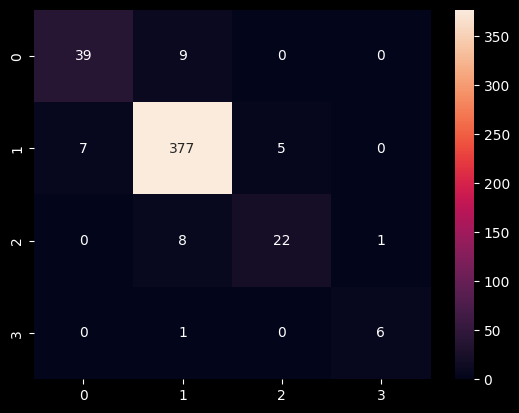

In [ ]:
trainedforest_pca = trainedforestRS.fit(X_train_pca,y_train)    # RandomForest número 3 con PCA. RandomizedSearch

predictionforest_pca = trainedforest_pca.predict(X_test_pca)    # inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca))  

##### **Mejores variables**

In [111]:
standard_scaler = StandardScaler()
data_le2 = standard_scaler.fit_transform(data_le)

bestfeatures = SelectKBest(score_func = f_classif, k = 10)  # las 10 mejores variables
fit = bestfeatures.fit(data_le,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_le.columns)

# 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nsmallest(50,'Score'))

              Specs     Score
115  Kf.6mm..Axis.1  0.109074
134             X.6  0.118163
131             X.5  0.172489
80     Ks.6mm..Axis  0.243469
114  Ks.6mm..Axis.1  0.458998
176            X.10  0.528028
110  Ks.0mm..Axis.1  0.675097
338           idEye  0.681758
144  Ks.6mm..Axis.2  0.904840
284          OffY.1  1.043961
182            X.12  1.248340
58   Regular.Axis.5  1.347511
140  Kf.0mm..Axis.2  1.383071
19        Kf.Axis.2  1.545354
76     Kf.0mm..Axis  1.678202
4           Kf.Axis  1.700406
12        Kf.Axis.1  1.700406
112  Kf.0mm..Axis.1  1.713013
31        LocationX  1.729454
188            X.14  1.906511
17        Ks.Axis.2  1.928462
25        Kf.Axis.3  2.090288
56   Regular.Axis.4  2.148663
205            X.18  2.165515
185            X.13  2.253056
283          OffX.1  2.436326
199            X.16  2.590206
173             X.9  2.662821
213        Ecc.4mm.  3.190621
250     LocationX.1  3.279508
179            X.11  3.393367
277            OffX  3.687613
202       

In [113]:
X = data_le.iloc[:,2:] #creating input features
full_data = X.copy()
full_data['labels'] = y
full_data.head(10)

,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,ACCP,Ks.1,Ks.Axis.1,Kf.1,...,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye,labels
0,21,39.22,111,41.87,5.32,86.7,41.67,49.61,21,43.69,...,97,-0.722,3.350,1.053,3.512,99,45,27,1638,0
1,39,42.46,129,43.15,1.38,88.2,43.14,48.84,39,47.30,...,97,0.085,0.921,0.290,0.966,100,0,0,1637,1
2,66,44.41,156,44.61,0.40,83.0,44.70,49.92,66,49.47,...,9,0.268,0.263,0.640,0.692,100,0,0,1822,1
3,51,42.31,141,43.15,1.69,97.3,43.16,49.01,51,47.13,...,275,-0.281,3.396,1.419,3.680,100,0,29,2204,0
4,26,45.20,116,45.31,0.22,93.3,45.29,50.60,26,50.36,...,85,0.109,0.691,0.181,0.714,100,0,7,2203,1
5,68,42.51,158,52.74,20.47,95.5,49.96,70.17,68,47.36,...,45,-1.581,13.387,9.154,16.218,98,95,0,2399,1
6,85,42.86,175,43.54,1.37,96.7,43.55,49.27,85,47.75,...,88,0.105,0.398,0.376,0.548,100,0,0,2398,1
7,170,43.75,80,44.18,0.86,97.9,44.14,49.70,170,48.74,...,20,0.375,0.437,0.360,0.566,100,0,52,2592,1
8,174,43.03,84,43.58,1.10,97.2,43.52,49.16,174,47.93,...,229,0.353,0.371,0.485,0.611,100,0,63,2593,1
9,165,45.37,75,45.60,0.46,96.8,45.60,51.05,165,50.55,...,74,0.269,0.330,0.315,0.457,100,0,24,2968,1


In [114]:
importancia = full_data.drop('labels', axis=1).apply(lambda x: x.corr(full_data.labels))
indices = np.argsort(importancia)
importancia[indices]

C:\Users\zahid\AppData\Local\Temp\ipykernel_444\3774559747.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  importancia[indices]


X270deg      -0.569090
Apex         -0.568029
Apex.3       -0.568029
X225deg      -0.562127
X315deg      -0.551746
                ...   
Kf.0mm.       0.325440
Kf.1          0.325671
Kf            0.325708
Kf.4          0.325708
Avg_H.5mm.    0.328171
Length: 337, dtype: float64

In [115]:
names=full_data.columns


l=[]
for i in range(0, len(indices)):
    if np.abs(importancia[i])>0.2:
        l.append(names[i])
print(l)

['Kf', 'AvgK', 'ACCP', 'Ks.1', 'Kf.1', 'AvgK.1', 'Kf.2', 'AvgK.2', 'AA.2', 'Ks.3', 'Kf.3', 'AvgK.3', 'AA.3', 'Apex', 'Thinnest', 'Spherical', 'Spherical.1', 'Spherical.2', 'Spherical.3', 'Spherical.4', 'Spherical.6', 'Spherical.7', 'ApexK', 'Ks.0mm.', 'Kf.0mm.', 'AvgK.0mm.', 'OSI.9mm.', 'CSI', 'ACP.3mm.', 'ApexK.1', 'Kf.0mm..1', 'AvgK.0mm..1', 'ACP.3mm..1', 'ApexK.2', 'Ks.0mm..2', 'Kf.0mm..2', 'AvgK.0mm..2', 'CSI.2', 'ACP.3mm..2', 'Highest.0mm.3mm.', 'RMS_E.3mm.', 'RMS_E.4mm.', 'RMS_E.5mm.', 'RMS_E.6mm.', 'SR_E.4mm..1', 'Avg_H.5mm.', 'Avg_H.6mm.', 'Avg_H.7mm.', 'Avg_H.8mm.', 'Avg_H.9mm.', 'SR_H.3mm..1', 'SR_H.4mm..1', 'SR_H.5mm..1', 'SR_H.6mm..1', 'Avg_H.5mm..1', 'Avg_H.6mm..1', 'Avg_H.7mm..1', 'Avg_T.6mm.', 'Sph..Keratometric.', 'Thinnest.1', 'Score.Anterior.', 'Height.Avg..Angle0.360.Dia8.FlatRate0.', 'Ks.4', 'Kf.4', 'OSI', 'CSI.3', 'MaxElv', 'RangeElv', 'LabelNum', 'LabelNum.1', 'Apex.3', 'X0deg', 'X45deg', 'X90deg', 'X135deg', 'X180deg', 'X225deg', 'X270deg', 'X315deg', 'X0deg.1', 

C:\Users\zahid\AppData\Local\Temp\ipykernel_444\238368736.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(importancia[i])>0.2:


In [116]:
X = full_data[l]
X

,Kf,AvgK,ACCP,Ks.1,Kf.1,AvgK.1,Kf.2,AvgK.2,AA.2,Ks.3,...,X0deg.1,X45deg.1,X90deg.1,X135deg.1,X180deg.1,BFS.3mm.,BFS.1mm..1,SA.C40..1,SA.C40..5,ESI.Anterior.
0,39.22,41.87,41.67,49.61,43.69,46.65,-6.88,-7.08,74.6,42.66,...,808,796,754,743,683,7.89,5.75,-0.893,-0.722,45
1,42.46,43.15,43.14,48.84,47.30,48.07,-5.96,-6.13,83.2,42.78,...,665,701,720,682,640,7.69,6.35,0.046,0.085,0
2,44.41,44.61,44.70,49.92,49.47,49.70,-6.26,-6.40,76.3,43.58,...,605,616,648,603,550,7.33,6.17,0.252,0.268,0
3,42.31,43.15,43.16,49.01,47.13,48.07,-6.99,-7.11,84.0,42.11,...,728,774,848,895,951,7.48,5.09,-0.159,-0.281,0
4,45.20,45.31,45.29,50.60,50.36,50.48,-6.22,-6.33,87.1,44.45,...,602,614,616,577,529,7.37,6.11,0.097,0.109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,45.79,46.19,46.18,51.91,51.01,51.46,-6.49,-6.64,84.1,45.36,...,697,719,718,685,596,7.24,5.43,0.068,0.164,0
3158,43.90,43.97,44.00,49.07,48.91,48.99,-6.05,-6.17,90.2,42.98,...,583,622,637,638,626,7.56,6.70,0.223,0.242,0
3159,43.47,43.80,43.82,49.16,48.43,48.79,-5.99,-6.07,90.0,43.30,...,618,641,641,623,583,7.64,6.33,0.330,0.348,0
3160,44.74,45.66,45.77,51.91,49.84,50.87,-6.23,-6.41,88.8,45.46,...,592,608,672,674,633,7.04,5.47,-0.085,-0.124,0


In [117]:
y

array([0, 1, 1, ..., 1, 1, 1], shape=(3162,))

In [118]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X ,y ,train_size=0.85, random_state=None)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.95      0.98      0.96       395
           2       0.75      0.56      0.64        32
           3       1.00      1.00      1.00        16

    accuracy                           0.94       475
   macro avg       0.90      0.84      0.86       475
weighted avg       0.94      0.94      0.94       475



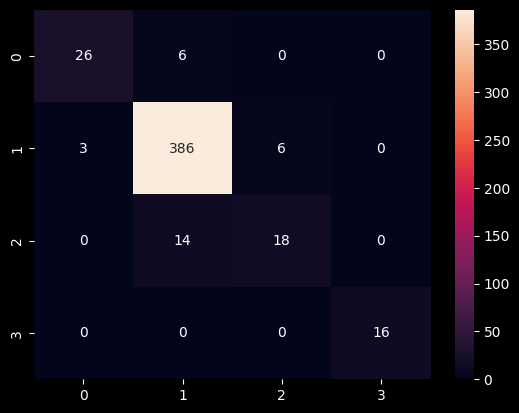

In [119]:
trainedforest1 = trainedforestGS.fit(X_train1,y_train1)

predictionforest1 = trainedforestGS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.95      0.98      0.96       395
           2       0.75      0.56      0.64        32
           3       1.00      0.94      0.97        16

    accuracy                           0.94       475
   macro avg       0.90      0.84      0.87       475
weighted avg       0.94      0.94      0.94       475



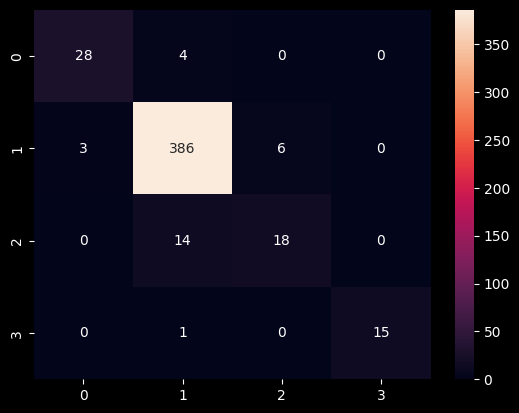

In [120]:
trainedforest1 = trainedforestRS.fit(X_train1,y_train1)

predictionforest1 = trainedforestRS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.95      0.98      0.96       395
           2       0.75      0.56      0.64        32
           3       1.00      1.00      1.00        16

    accuracy                           0.94       475
   macro avg       0.90      0.85      0.87       475
weighted avg       0.94      0.94      0.94       475



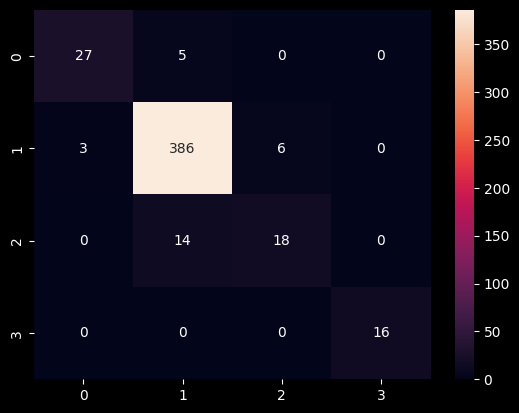

In [121]:
trainedforest1 = trainedforestGS.fit(X_train1,y_train1)

predictionforest1 = trainedforestGS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))